# **GRU Exercise**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [2]:
dataframe = pd.read_csv('/content/traffic (1).csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


## Data Exploration



In [3]:
print(dataframe.describe())

           Vehicles
count  48120.000000
mean      22.791334
std       20.750063
min        1.000000
25%        9.000000
50%       15.000000
75%       29.000000
max      180.000000


## Feature Engineering (if needed)



## Exploratory Data Analysis


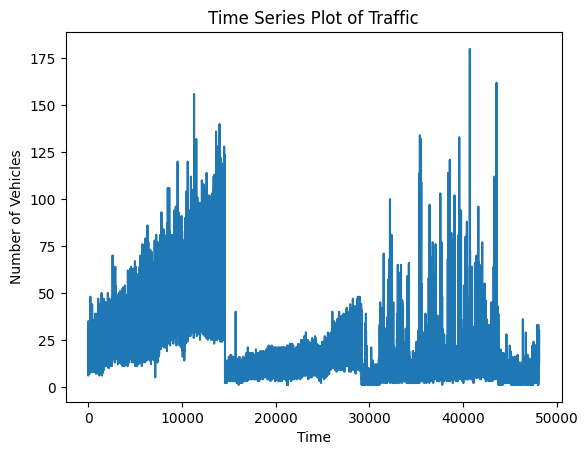

In [4]:
import matplotlib.pyplot as plt
plt.plot(dataframe['Vehicles'])
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.title('Time Series Plot of Traffic')
plt.show()

## split into train and test sets

In [6]:
train_size = int(len(dataset) * 0.8)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Model Building



In [8]:
seq_length = 10
model = Sequential()
model.add(GRU(50, input_shape=(seq_length, 1)))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting The Model



In [12]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
X_train, y_train = create_sequences(train, seq_length)

history = model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 555.9806
Epoch 2/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 97.6774
Epoch 3/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 43.0860
Epoch 4/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 27.1013
Epoch 5/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 22.9238
Epoch 6/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 20.3864
Epoch 7/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 19.7644
Epoch 8/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 19.2472
Epoch 9/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 18.3029
Epoch 10/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 18.9435
Epoch 11/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 18.8890
Epoch 12/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 17.3111
Epoch 13/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 17.6692
Epoch 14/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 16.96

## Make preductuion and evaluatuin matrix.

In [19]:
X_test, y_test = create_sequences(test, seq_length)

In [20]:
predictions = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Visualize the result

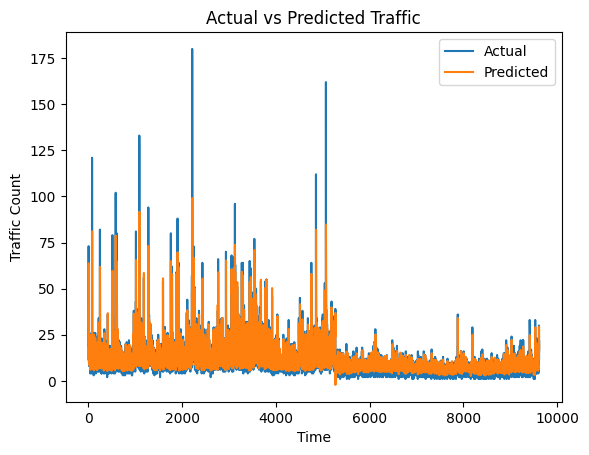

In [22]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Count')
plt.title('Actual vs Predicted Traffic')
plt.legend()
plt.show()

# **Well done** :)